<a href="https://colab.research.google.com/github/pfjapena/youtube_channel/blob/main/4_Reto_Parcial_I_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reto Parcial 1**

0. Se procede con la carga de las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

#Para la carga de los archivos de forma automática
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los datos de trabajo

In [ ]:
#Se procede con la carga de los datos
nxl='/content/drive/MyDrive/1. AnalíticaNegocios(01-2025)/1. BD1_Longitudinal Survey.xlsx'

XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB[['Age','Mother_Edu','Father_Edu','FamilySize','Self_Esteem','Height','Weight','Income','HealthPlan']]
XDB=XDB.dropna()

XD=np.array(XDB[['Age','Mother_Edu','Father_Edu','FamilySize','Self_Esteem','Height','Weight','Income']])
yd=np.array(XDB[['HealthPlan']])

print("El número de datos totales es:",len(XD))
ND1=len(np.where((yd==1))[0])
print("El porcentaje de personas que poseen un plan de salud es:",ND1/len(XD))
ND2=len(np.where((yd==0))[0])
print("El porcentaje de personas que no poseen un plan de salud es:",ND2/len(XD))

El número de datos totales es: 5963
El porcentaje de personas que poseen un plan de salud es: 0.8569511990608754
El porcentaje de personas que no poseen un plan de salud es: 0.14304880093912462


#**Modelo Naive Bayes**

In [ ]:
#Se procede con la construcción del modelo propuesto
mnb=GaussianNB()
mnb.fit(XD,yd)
ydp=mnb.predict(XD)
ydpdf=pd.DataFrame(ydp)

#Para obtener la información del modelo
u=mnb.theta_
sigma=np.sqrt(mnb.var_)
cv=u/sigma
LI=u-sigma; LS=u+sigma
ndc=mnb.class_count_
pdnc=mnb.class_prior_  #% de los datos por categoría de riesgo

np.set_printoptions(suppress=True,precision=3)
print("títulos")
print("'Age','Mother_Edu','Father_Edu','FamilySize','Self_Esteem','Height','Weight','Income'")
print("La media de los datos es\n:",u)
print("La varianza de los datos es:\n",sigma)
print("Los limites superiores son:\n",u+sigma)
print("Los limites inferiores son:\n",u-sigma)

#Evaluar el comportamiento dle modelo
cm=confusion_matrix(yd,ydp)
print(cm)

#Se procede a determinar los valores Positivos y Negativos
VN=cm[0,0]  #Verdaderos Negativos
FP=cm[0,1]  #Falsos Positivos
FN=cm[1,0]  #Falsos Negativos
VP=cm[1,1]  #Verdaderos Positivos

#Se puede enviar la matriz de confusión al excel para hacer los calculos
df=pd.DataFrame(cm)
df.to_excel("MatrizConfusión.xlsx")

#Se puede enviar la matriz de confusión al excel para hacer los calculos
df=pd.DataFrame(cm)
df.to_excel("MatrizConfusión.xlsx")

Exactitud=(VP+VN)/len(XD)
print("La Exactitud es:",Exactitud) #Comportamiento General

TE=(FN+FP)/len(XD)
print("La Tasa de Error es:", TE) #Porcentaje Equivocaciones

Sensibilidad=VP/(VP+FN)
print("Sensibilidad es:", Sensibilidad)  #Como se comportó frente a los positivos

Especificidad=VN/(VN+FP)
print("Especificidad es:", Especificidad)  #Como se comportó frente a los negativos

Precision=VP/(VP+FP)
print("La precisión es:", Precision) #Como le pego a los clasificados positivos

PredNeg=VN/(VN+FN)
print("La probabilidad de Negativo es:", PredNeg) #Como le pego a los clasificados negativos

#Determinar de manera particular si la persona
X=np.array([[18,12,12,5,28,71,180,48000]])
Vp=np.exp(-0.5*((u[:,:]-X)/sigma)**2)
np.where(np.max(np.prod(Vp,axis=1))==np.prod(Vp,axis=1))
print("Con respecto al plan de salud, la persona esta en la categoría:",mnb.predict(X))

títulos
'Age','Mother_Edu','Father_Edu','FamilySize','Self_Esteem','Height','Weight','Income'
La media de los datos es
: [[   18.273    10.054     9.798     4.981    21.544    66.897   146.29
  16424.474]
 [   18.377    11.244    11.235     4.646    22.604    66.988   145.515
  35289.801]]
La varianza de los datos es:
 [[    2.472     3.521     4.155     2.616     4.18      4.16     29.397
  21525.371]
 [    2.472     3.294     4.037     2.437     4.196     4.183    30.265
  36314.615]]
Los limites superiores son:
 [[   20.745    13.575    13.954     7.597    25.724    71.057   175.686
  37949.844]
 [   20.85     14.537    15.272     7.083    26.799    71.171   175.78
  71604.415]]
Los limites inferiores son:
 [[   15.801     6.533     5.643     2.366    17.364    62.737   116.893
  -5100.897]
 [   15.905     7.95      7.198     2.208    18.408    62.805   115.25
  -1024.814]]
[[ 113  740]
 [ 265 4845]]
La Exactitud es: 0.8314606741573034
La Tasa de Error es: 0.16853932584269662
Sensib

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#**Modelo Arbol de Decisión**

1. Se construye el modelo de Árbol de Decisión

In [ ]:
#Se procede con la construcción del modelo arbol
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)

#Para evaluar el comportamiento del modelo
from sklearn import metrics
ydp=mar.predict(XD)
print('La precisión en el pronostico es:',metrics.accuracy_score(yd,ydp))
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:")
print(cm)

#Se procede a determinar los valores Positivos y Negativos
VN=cm[0,0]  #Verdaderos Negativos
FP=cm[0,1]  #Falsos Positivos
FN=cm[1,0]  #Falsos Negativos
VP=cm[1,1]  #Verdaderos Positivos

#Se puede enviar la matriz de confusión al excel para hacer los calculos
df=pd.DataFrame(cm)
df.to_excel("MatrizConfusión.xlsx")

#Se puede enviar la matriz de confusión al excel para hacer los calculos
df=pd.DataFrame(cm)
df.to_excel("MatrizConfusión.xlsx")

Exactitud=(VP+VN)/len(XD)
print("La Exactitud es:",Exactitud) #Comportamiento General

TE=(FN+FP)/len(XD)
print("La Tasa de Error es:", TE) #Porcentaje Equivocaciones

Sensibilidad=VP/(VP+FN)
print("Sensibilidad es:", Sensibilidad)  #Como se comportó frente a los positivos

Especificidad=VN/(VN+FP)
print("Especificidad es:", Especificidad)  #Como se comportó frente a los negativos

Precision=VP/(VP+FP)
print("La precisión es:", Precision) #Como le pego a los clasificados positivos

PredNeg=VN/(VN+FN)
print("La probabilidad de Negativo es:", PredNeg) #Como le pego a los clasificados negativos

La precisión en el pronostico es: 0.8574543015260775
La matriz de confusión es:
[[   3  850]
 [   0 5110]]
La Exactitud es: 0.8574543015260775
La Tasa de Error es: 0.1425456984739225
Sensibilidad es: 1.0
Especificidad es: 0.0035169988276670576
La precisión es: 0.8573825503355704
La probabilidad de Negativo es: 1.0


2. Se procede con la obtención del gráfico del árbol

In [ ]:
#Se procede con la gráficación del árbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs=['Age','Mother_Edu','Father_Edu','FamilySize','Self_Esteem','Height','Weight','Income']

dot_data=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_data)
graph.write_png('4.Tree TechSales_L.png')

True

#**Métodos de Clusterización**

1. Se identifica las correlaciones entre las variables

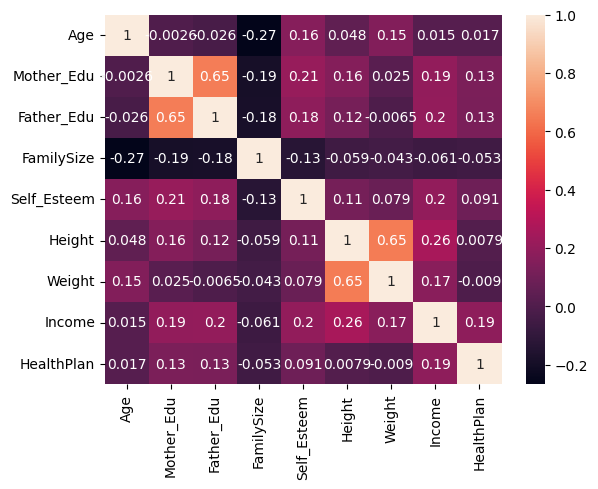

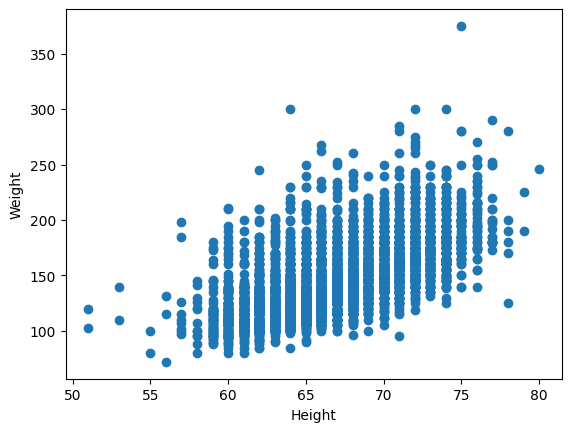

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


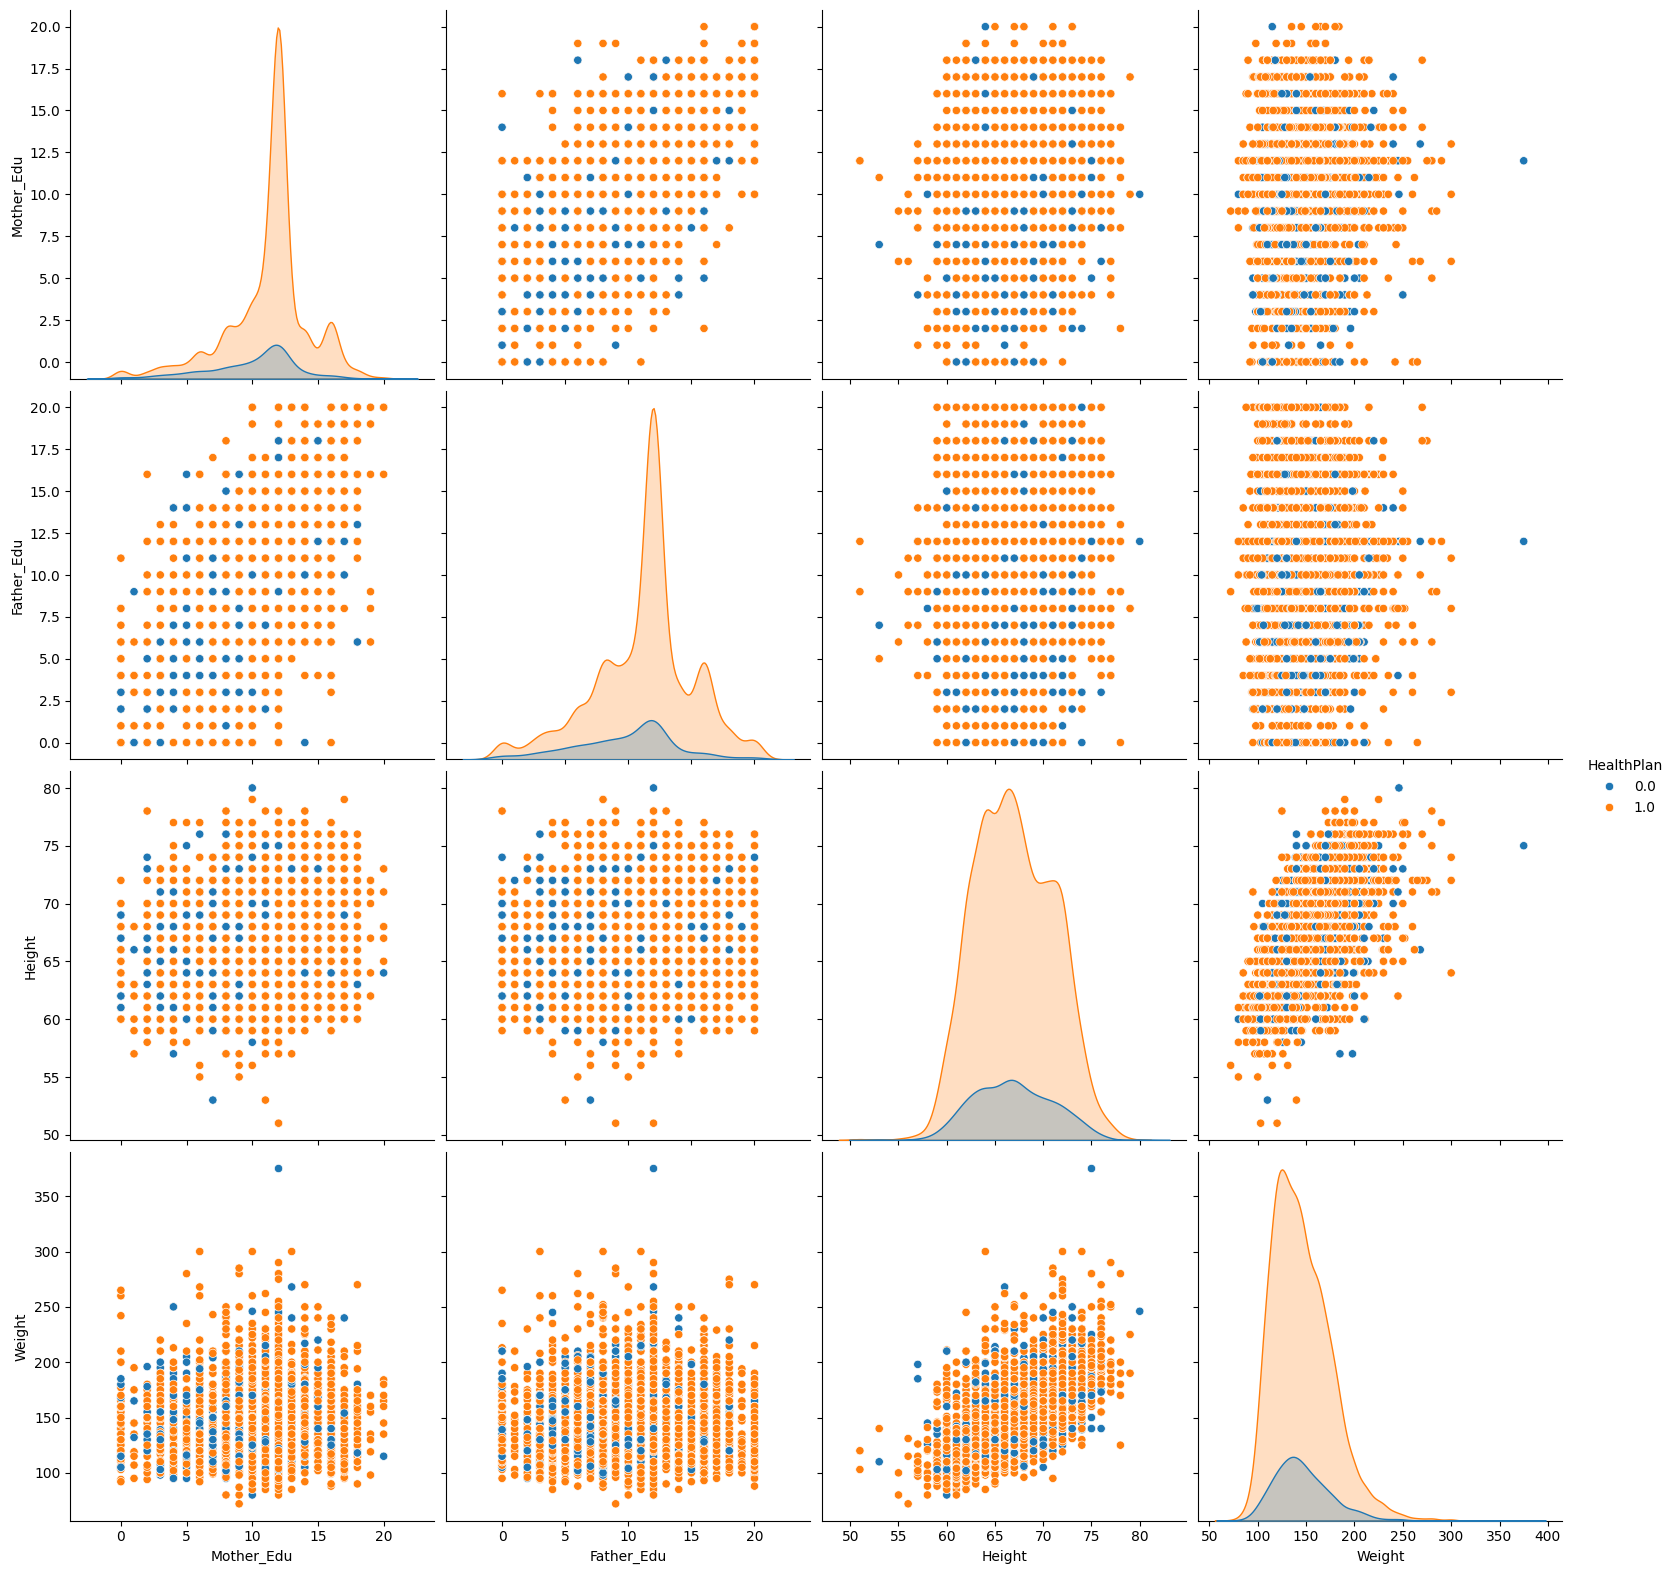

In [ ]:
#Se construye un mapa de calor
plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()

#Se procede con la carga de la base de datos
XD=np.array(XDB[['Age','Mother_Edu','Father_Edu','FamilySize','Self_Esteem','Height','Weight','Income']])
yd=np.array(XDB[["HealthPlan"]])

plt.figure()
plt.scatter(XD[:,5],XD[:,6])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#Se procede a la exploración de cada una de las variables por variable deseada
sns.pairplot(XDB.dropna(), hue='HealthPlan',size=4,vars=['Mother_Edu','Father_Edu','Height','Weight'],kind='scatter')


2. Se procede con la construcción del modelo propuesto

Determinar las características de cada uno de los clsuters:
 [[    18.353     11.696     11.824      4.502     23.308     68.292
     152.444  49125.363]
 [    18.383     10.591     10.384      4.854     21.549     65.677
     139.277   4246.27 ]
 [    18.632     13.256     13.752      4.325     24.897     69.692
     160.436 216200.   ]
 [    18.341     10.704     10.569      4.75      22.212     66.659
     144.007  25652.304]
 [    18.349     12.548     13.         4.426     24.171     69.199
     155.121  88203.589]]


,0,1,2
0,1404.0,0.963675,0.036325
1,1779.0,0.741990,0.258010
2,117.0,0.957265,0.042735
3,2276.0,0.855448,0.144552
4,387.0,0.976744,0.023256


[[   0  853]
 [   0 5110]]
La exactitud es:
 0.8569511990608754
La sensibilidad es:
 1.0
La especificidad es:
 0.0
La precisión es:
 0.8569511990608754
La tasa de error es:
 0.14304880093912462
La tasa de predicción negativa es:
 nan


<ipython-input-7-4fb90a541d8c>:45: RuntimeWarning: invalid value encountered in scalar divide
  PredNeg=VN/(VN+FN) #Como funciona el modelo negando créditos


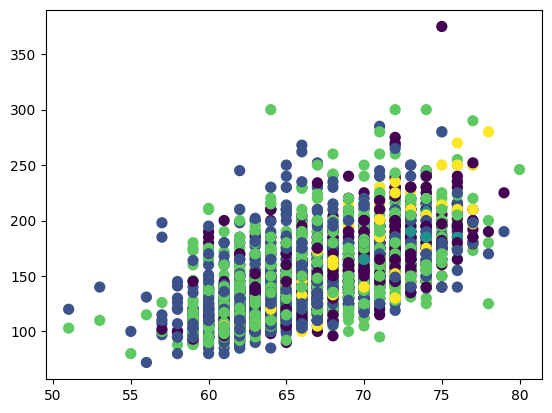

In [ ]:
np.random.seed(42)  #Se crean los mismos números aleatorios

#Se procede con la caracterización de los labels
k = 5
mkm=KMeans(n_clusters=k,init='random',random_state=42)
mkm.fit(XD,yd)
centroids = mkm.cluster_centers_
ydc = mkm.labels_

print("Determinar las características de cada uno de los clsuters:\n",centroids)

plt.scatter(XD[:, 5], XD[:, 6], c=ydc, s=50, cmap='viridis')

#Se procede con la caracterización de los clusters
ND = np.bincount(ydc)
XDB["cluster"]=ydc
NApr = XDB.groupby("cluster").agg({"HealthPlan": lambda x: (x == 1).sum()}); NApr=np.array(NApr)/ND[:,None]
Nneg = XDB.groupby("cluster").agg({"HealthPlan": lambda x: (x == 0).sum()}); Nneg=np.array(Nneg)/ND[:,None]

df=pd.DataFrame(np.column_stack((ND,NApr,Nneg)))
display(df)

ydp=np.zeros((len(XDB),1))

for i in range(len(XDB)):
  if NApr[ydc[i]]>Nneg[ydc[i]]:
    ydp[i]=1

#Se procede a evaluar el modelo utilizando la matriz de confusión
cm=confusion_matrix(yd,ydp)
print(cm)

VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

Exactitud=(VP+VN)/(VP+VN+FP+FN) #Funcionamiento general del modelo
print("La exactitud es:\n",Exactitud)
Sensibilidad=VP/(VP+FN) #Como se comporto el modelo con los Aprobados
print("La sensibilidad es:\n",Sensibilidad)
Especificidad=VN/(VN+FP) #Como se comporto el modelo con los Negado
print("La especificidad es:\n",Especificidad)
Precisión=VP/(VP+FP)    #Cual es el acierto clasificando los positivos
print("La precisión es:\n",Precisión)
TasaError=(FP+FN)/(VP+VN+FP+FN) #Equivocación General
print("La tasa de error es:\n",TasaError)
PredNeg=VN/(VN+FN) #Como funciona el modelo negando créditos
print("La tasa de predicción negativa es:\n",PredNeg)

3. Se procede con la gráfica de los cluster

'Age','Mother_Edu','Father_Edu','FamilySize','Self_Esteem','Height','Weight','Income'
La respuesta de la predicción es: [0]


<ipython-input-35-d848818acfd7>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


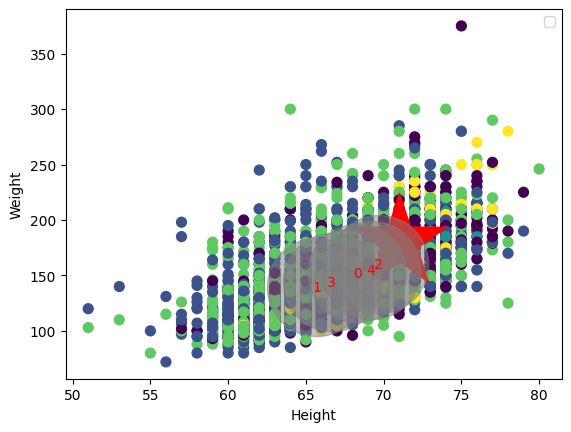

In [ ]:
XD1=np.array([[18,12,12,5,28,71,180,48000]])
ydp1=mkm.predict(XD1)

print("'Age','Mother_Edu','Father_Edu','FamilySize','Self_Esteem','Height','Weight','Income'")
print("La respuesta de la predicción es:",ydp1)

plt.scatter(XD[:, 5], XD[:, 6], c=ydc, s=50, cmap='viridis')
plt.scatter(XD1[:,5],XD1[:,6],marker='*',s=5000,facecolors='red')
plt.scatter(centroids[:,5],centroids[:,6],alpha=0.5,marker='o',s=5000,facecolors='grey')

for i, c in enumerate(centroids):
    plt.text(c[5], c[6], str(i), fontsize=10, color='red', ha='center', va='center')

plt.legend()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()